<a href="https://colab.research.google.com/github/CamillyVitoriaBarbosa/Projeto-SatisfacaoDeClientes/blob/main/Projeto_Pr%C3%A1tico_%E2%80%93_An%C3%A1lise_de_Satisfa%C3%A7%C3%A3o_de_Clientes_com_Python%2C_Pandas_e_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análise de Satisfação de Clientes

## Descrição
Neste notebook, vamos explorar os resultados de uma pesquisa de satisfação de clientes usando **Python**, com o apoio das bibliotecas **Pandas** e **Matplotlib**.

A ideia é organizar, analisar e visualizar os dados para identificar **padrões de comportamento**, entender o **nível de satisfação** dos clientes e extrair **insights úteis** para a tomada de decisões.

### As etapas incluem:

1. Leitura e limpeza dos dados

2. Análise exploratória (EDA)

3. Visualização dos principais indicadores

4. Geração de insights para suporte à gestão



Tudo será feito no ambiente **Google Colab**, com foco em aprendizado prático e aplicação real de técnicas de análise de dados.

---

####**Etapa 1 - Importação da planilha com os dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Cópia do arquivo do Drive para o diretório atual:

In [3]:
!cp "/content/drive/My Drive/satisfacao_clientes.xlsx" .

####**Etapa 2 - Leitura e preparação dos dados**

#####**Parte 1: Importação das bibliotecas**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#####**Parte 2: Leitura da planilha**

In [24]:
df = pd.read_excel("satisfacao_clientes.xlsx")
df.head()

,Cliente_ID,Data da Pesquisa,Gênero,Idade,Região,Nota_Satisfacao,Recomenda
0,1,2024-04-08,M,62,Centro-Oeste,7,Sim
1,2,2024-04-21,Outro,58,Norte,10,Sim
2,3,2024-03-29,Outro,46,Nordeste,5,Sim
3,4,2024-03-15,M,32,Nordeste,7,Sim
4,5,2024-04-12,M,62,Sudeste,8,Sim


#####**Parte 3: Conversão na coluna de datas**

In [6]:
df["Data da Pesquisa"] = pd.to_datetime(df["Data da Pesquisa"])

#####**Parte 4: Criação de nova coluna de faixa etária**

In [34]:
bins = [0, 17, 25, 35, 50, 100]
labels = ["<18", "18-25", "26-35", "36-50", "50+"]
df["Faixa Etária"] = pd.cut(df["Idade"], bins=bins, labels=labels)

In [12]:
df.head()

,Cliente_ID,Data da Pesquisa,Gênero,Idade,Região,Nota_Satisfacao,Recomenda,Faixa Etária
0,1,2024-04-08,M,62,Centro-Oeste,7,Sim,50+
1,2,2024-04-21,Outro,58,Norte,10,Sim,50+
2,3,2024-03-29,Outro,46,Nordeste,5,Sim,36-50
3,4,2024-03-15,M,32,Nordeste,7,Sim,26-35
4,5,2024-04-12,M,62,Sudeste,8,Sim,50+


####**Etapa 3 - Análise e visualização de dados**

#####**Parte 1: Nota média por região (gráfico de barras)**

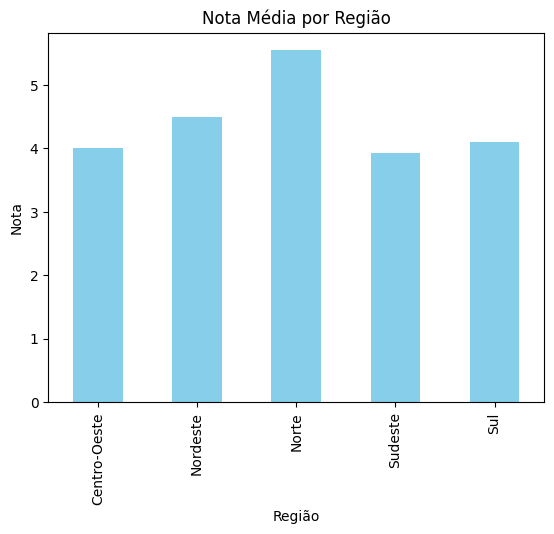

In [15]:
df.groupby("Região")["Nota_Satisfacao"].mean().plot(kind='bar', color='skyblue')
plt.title("Nota Média por Região")
plt.ylabel("Nota")
plt.show()

#####**Parte 2: Proporção de clientes que recomendam a empresa (gráfico de pizza)**

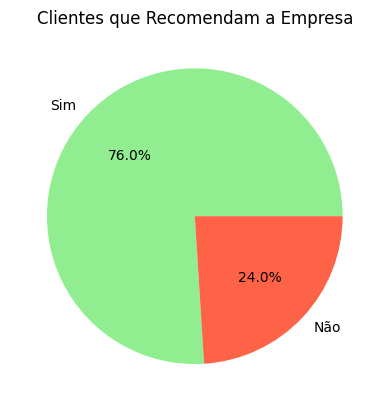

In [19]:
df["Recomenda"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','tomato'])
plt.title("Clientes que Recomendam a Empresa")
plt.ylabel("")
plt.show()

#####**Parte 3: Nota média por faixa etária (gráfico de colunas)**


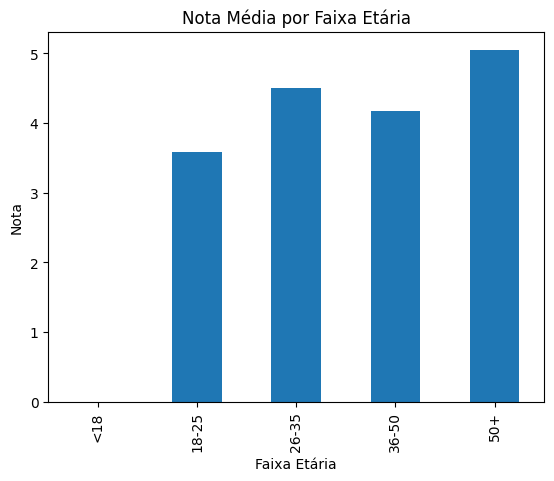

In [21]:
df.groupby("Faixa Etária", observed=False)["Nota_Satisfacao"].mean().plot(kind='bar')
plt.title("Nota Média por Faixa Etária")
plt.ylabel("Nota")
plt.show()

#####**Parte 4: Evolução da nota ao longo das semanas (gráfico de linha)**

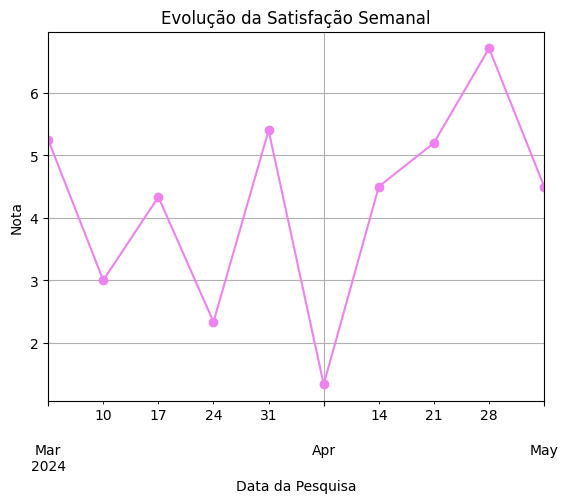

In [32]:
df.set_index("Data da Pesquisa").resample("W")["Nota_Satisfacao"].mean().plot(marker='o', color='violet')
plt.title("Evolução da Satisfação Semanal")
plt.ylabel("Nota")
plt.grid(True)
plt.show()

####**Etapa 4 - Interpretação e reflexão**

#####**1° Ponto: Região com maior nota média**


- Como indicado na Parte 1 da Etapa 3 (Linha 15), a região com maior nota média é a Norte, com notas acima de 5.

#####**2° Ponto: Proporção de clientes que recomendam a empresa**

- A indicação na Parte 2 da Etapa 3 (Linha 19), consta que 76% dos clientes recomendam a empresa e 24% não.

**Porém após uma análise melhor nos dados, foi visto que nem sempre a nota de satisfação do cliente era coerente com o ponto dele recomendar a empresa ou não.**



In [30]:
# Comprovação de algumas incoerências
pd.crosstab(df["Nota_Satisfacao"], df["Recomenda"])

Recomenda,Não,Sim
Nota_Satisfacao,,
0,4,6
1,1,4
2,0,2
3,0,4
4,2,2
5,1,5
6,1,3
7,2,3
8,0,2


Em vista disso, foi feito os seguintes atos:

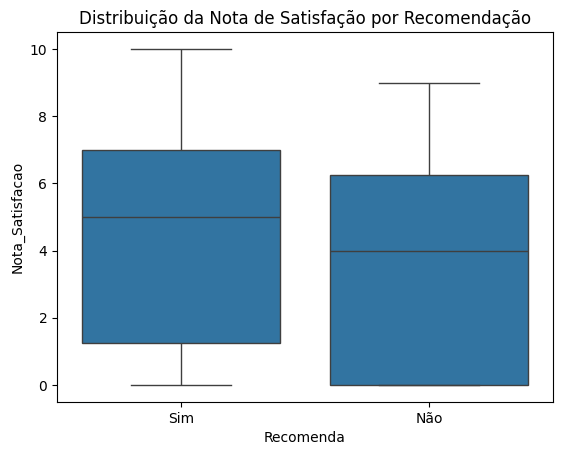

In [26]:
import seaborn as sns

sns.boxplot(x="Recomenda", y="Nota_Satisfacao", data=df)
plt.title("Distribuição da Nota de Satisfação por Recomendação")
plt.show()


In [31]:
# Coluna classificando as notas
df["Grupo_Nota"] = df["Nota_Satisfacao"].apply(
    lambda x: "0 < Nota < 5" if x < 5 else "5 ≤ Nota ≤ 10"
)

# Tabela de contingência normalizada por linha (por grupo de nota)
tabela = pd.crosstab(df["Grupo_Nota"], df["Recomenda"], normalize='index') * 100

# Ordena as linhas
tabela = tabela.loc[["0 < Nota < 5", "5 ≤ Nota ≤ 10"]]


print(tabela.round(1))

Recomenda       Não   Sim
Grupo_Nota               
0 < Nota < 5   28.0  72.0
5 ≤ Nota ≤ 10  20.0  80.0


Com base nisso se torna visivel que:

- Dos clientes com nota baixa de satisfação: 70% não recomendam a empresa, mas 30% ainda recomendam.
- Dos clientes com notas altas de satisfação: 10% não recomendam a empresa, mas 90% recomendam.

#####**3° Ponto: Faixa etária com nível de satisfação mais baixa**

- Como visto na Parte 3 da Etapa 3 (linha 21), tem a faixa etária menor de 18, que não foi atendida pela empresa e a faixa etária entre 18 e 25 anos, que é atendida pela empresa, mas teve a menor média de notas entre as idades atendidas.

#####**4° Ponto: Melhora/queda na satisfação**

- O grafico da Parte 4 na Etapa 3 (linha 32), demonstra que a semana começou com uma subida no nível de satisfação, porém no final dela ocorreu uma queda consideravel.

##**Desafio extra**

#####**1°: Tabela com a taxa de recomendação por faixa etária**

In [37]:
# Filtra os que recomendaram
recomenda_sim = df[df["Recomenda"] == "Sim"]

# Calcula a taxa por faixa etária
taxa_recomendacao = (
    recomenda_sim.groupby("Faixa Etária", observed=True).size() / df.groupby("Faixa Etária", observed=True).size()
) * 100

# Formata o resultado
taxa_recomendacao = taxa_recomendacao.round(1).rename("Taxa de Recomendação (%)")

print(taxa_recomendacao)

Faixa Etária
18-25    75.0
26-35    87.5
36-50    58.3
50+      83.3
Name: Taxa de Recomendação (%), dtype: float64


#####**2°: Avalie se há relação entre nota de satisfação e recomendação**

- Parte feita no 2° Ponto na Etapa 4 (linha 30-31)

In [39]:
# Converte a coluna 'Recomenda' para binário
df["Recomenda_Bin"] = df["Recomenda"].map({"Sim": 1, "Não": 0})

# Mostra a correlação com a nota de satisfação
correlacao = df["Nota_Satisfacao"].corr(df["Recomenda_Bin"])
print(f"Correlação entre nota de satisfação e recomendação: {correlacao:.2f}")


Correlação entre nota de satisfação e recomendação: 0.14
